# ARIMA 모델

In [1]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

In [2]:
# ARIMA 모델을 활용한 시계열 데이터 예측

def parser(x):
  from datetime import datetime
  return datetime.strptime('199'+x, '%Y-%m')

series = pd.read_csv('/content/drive/MyDrive/딥러닝 파이토치 실습/7. 시계열 분석/sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = pd.DataFrame(series.dropna()).reset_index()
series['Month'] = series['Month'].map(lambda x: parser(x))
series = series.set_index('Month').squeeze()

model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)

print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Sat, 26 Nov 2022   AIC                            406.340
Time:                                                 05:14:35   BIC                            417.227
Sample:                                             02-01-1991   HQIC                           410.098
                                                  - 12-01-1993                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

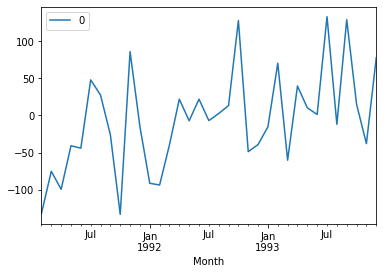

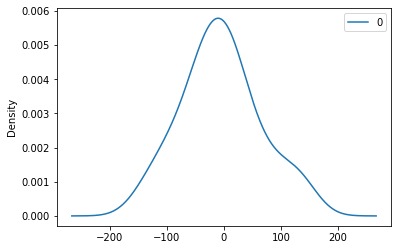

                0
count   35.000000
mean    -5.495202
std     68.132883
min   -133.296592
25%    -42.477905
50%     -7.186574
75%     24.748352
max    133.237978


In [3]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()

print(residuals.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted: [349.11766293], expected: 342.3
predicted: [306.51291378], expected: 339.7
predicted: [387.37645093], expected: 440.4
predicted: [348.15420565], expected: 315.9
predicted: [386.30876099], expected: 439.3
predicted: [356.08193992], expected: 401.3
predicted: [446.37948043], expected: 437.4
predicted: [394.73727041], expected: 575.5
predicted: [434.91542156], expected: 407.6
predicted: [507.92341742], expected: 682.0
predicted: [435.48296427], expected: 475.3
predicted: [652.74376119], expected: 581.3
predicted: [546.34356125], expected: 646.9
Test MSE: 6958.3251678747465


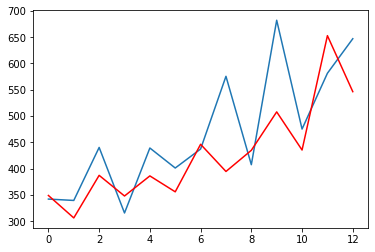

In [4]:
import numpy as np
from sklearn.metrics import mean_squared_error

X = series.values
X = np.nan_to_num(X)

size = int(len(X) * 0.66)

# train, test 분리
train, test = X[0 : size], X[size : len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):

  # 모델 선언 및 학습
  model = ARIMA(history, order=(5, 1, 0))
  model_fit = model.fit(disp=0)
  output = model_fit.forecast()

  # 모델 예측 값 저장
  yhat = output[0]
  predictions.append(yhat)

  # 실제 값 저장
  obs = test[t]
  history.append(obs)

  print(f'predicted: {yhat}, expected: {obs}')

error = mean_squared_error(test, predictions)
print(f'Test MSE: {error}')

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# 순환 신경망 (RNN)

In [5]:
!pip install --user torchtext==0.8.1 torch==1.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torchtext-0.8.1-cp37-cp37m-manylinux1_x86_64.whl (7.0 MB)
     |████████████████████████████████| 776.8 MB 16 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.8.0
    Uninstalling torch-1.8.0:
      Successfully uninstalled torch-1.8.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.9.0
    Uninstalling torchtext-0.9.0:
      Successfully uninstalled torchtext-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.9.0+cu111 requires torch==1.8.0, but you have torch 1.7.1 which is incompatible.
torchaudio 0.8.0 requires torch==1.8.0, but you have torch 1.7.1 which i

In [6]:
import torch, torchtext

import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import time

In [8]:
# 데이터셋 전처리
start = time.time()

TEXT = torchtext.data.Field(lower=True, fix_length=200, batch_first=False)
LABEL = torchtext.data.Field(sequential=False)

from torchtext import datasets
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

/root/.local/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/root/.local/lib/python3.7/site-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)


In [9]:
print(vars(train_data.examples[0]))

{'text': ['a', 'super,', 'unusual', 'film', 'from', 'audiard,', 'read', 'my', 'lips', 'is', 'a', 'pulpy,', 'lonely-', 'hearts', 'thriller.', "it's", 'perfect', 'for', 'the', 'handsomely', 'grizzled', 'charisma', 'of', 'vincent', 'cassel', 'and', 'features', 'a', 'marvellously', 'contained', 'performance', 'from', 'emanuelle', 'devos.', 'devos', 'is', 'a', 'recurring', 'feature', 'of', 'audiard', 'in', 'the', 'same', 'way', 'that', 'karin', 'viard', 'pops', 'up', 'for', 'jean-pierre', 'jeunet:', 'unconventionally', 'beautiful', "(she's", 'referred', 'to', 'by', 'everyone', 'as', 'unattractive', 'in', 'this', 'film),', 'versatile', 'and', 'capable', 'of', 'a', 'subordinate', 'profile.<br', '/><br', '/>this', 'is', 'almost', 'the', 'definition', 'of', 'her', 'role', 'as', 'carla,', 'a', 'put-upon', 'office', 'dogsbody,', 'taunted', 'by', 'colleagues', 'exploiting', 'her', 'deafness.', 'yet', 'she', 'finds', 'an', 'ami', "d'exploitation,", 'if', 'you', 'like', 'in', "cassel's", 'ex-con', '

In [10]:
# 데이터셋 전처리
import string

for example in train_data.examples:
  text = [i.lower() for i in vars(example)['text']] # 소문자로 변경
  text = [i.replace('<br', '') for i in text] # '<br'을 공백으로 변경
  text = [''.join(j for j in i if j not in string.punctuation) for i in text] # 구두점 제거
  text = [i for i in text if i] # 공백 제거
  vars(example)['text'] = text

print(vars(train_data.examples[0]))

{'text': ['a', 'super', 'unusual', 'film', 'from', 'audiard', 'read', 'my', 'lips', 'is', 'a', 'pulpy', 'lonely', 'hearts', 'thriller', 'its', 'perfect', 'for', 'the', 'handsomely', 'grizzled', 'charisma', 'of', 'vincent', 'cassel', 'and', 'features', 'a', 'marvellously', 'contained', 'performance', 'from', 'emanuelle', 'devos', 'devos', 'is', 'a', 'recurring', 'feature', 'of', 'audiard', 'in', 'the', 'same', 'way', 'that', 'karin', 'viard', 'pops', 'up', 'for', 'jeanpierre', 'jeunet', 'unconventionally', 'beautiful', 'shes', 'referred', 'to', 'by', 'everyone', 'as', 'unattractive', 'in', 'this', 'film', 'versatile', 'and', 'capable', 'of', 'a', 'subordinate', 'profile', 'this', 'is', 'almost', 'the', 'definition', 'of', 'her', 'role', 'as', 'carla', 'a', 'putupon', 'office', 'dogsbody', 'taunted', 'by', 'colleagues', 'exploiting', 'her', 'deafness', 'yet', 'she', 'finds', 'an', 'ami', 'dexploitation', 'if', 'you', 'like', 'in', 'cassels', 'excon', 'paul', 'each', 'exploits', 'the', 'o

In [11]:
# 훈련 및 검증 데이터 분리
import random

train_data, valid_data = train_data.split(random_state=random.seed(0), split_ratio=0.8)

print(f'train_data length: {len(train_data)}')
print(f'valid_data length: {len(valid_data)}')
print(f'test_data length: {len(test_data)}')

train_data length: 20000
valid_data length: 5000
test_data length: 25000


In [12]:
# 단어집합 생성
TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
LABEL.build_vocab(train_data)

print(f'Unique tokens in TEXT vocab: {len(TEXT.vocab)}')
print(f'Unique tokens in LABEL vocab: {len(LABEL.vocab)}')

Unique tokens in TEXT vocab: 10002
Unique tokens in LABEL vocab: 3


In [13]:
# LABEL ==> 긍정, 부정, <unk>
LABEL.vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7f258119f3d0>>,
            {'<unk>': 0, 'pos': 1, 'neg': 2})

In [15]:
# 데이터셋 메모리로 가져오기
BATCH_SIZE = 64
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

embeding_dim = 100 # 각 단어를 100차원으로 조정 (임베딩 계층을 통과한 후 각 벡터의 크기)
hidden_size = 300 # 은닉층의 유닛 개수

train_iterator, valid_iterator, test_iterator = torchtext.data.BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size=BATCH_SIZE,
    device=device
)

/root/.local/lib/python3.7/site-packages/torchtext/data/iterator.py:48: UserWarning: BucketIterator class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [16]:
# 워드 임베딩 및 RNN 셀 정의
class RNNCell_Encoder(nn.Module):
  def __init__(self, input_dim, hidden_size):
    super(RNNCell_Encoder, self).__init__()
    self.rnn = nn.RNNCell(input_dim, hidden_size)

  # inputs => 입력 시퀀스 (시퀀스 길이, 배치, 임베딩)
  def forward(self, inputs):
    bz = inputs.shape[1] # batch
    ht = torch.zeros((bz, hidden_size)).to(device) # 배치, 은닉층 뉴런의 크기를 0으로 초기화
    for word in inputs:
      ht = self.rnn(word, ht) # 재귀적으로 발생하는 상태 값 처리

    return ht

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.em = nn.Embedding(len(TEXT.vocab.stoi), embeding_dim) # 임베딩 처리 (임베딩 할 단어 수 또는 단어 집합의 크기, 임베딩할 벡터의 차원)
    self.rnn = RNNCell_Encoder(embeding_dim, hidden_size)
    self.fc1 = nn.Linear(hidden_size, 256)
    self.fc2 = nn.Linear(256, 3)

  def forward(self, x):
    x = self.em(x)
    x = self.rnn(x)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [17]:
model = Net() # model 객체화
model.to(device)

loss_fn = nn.CrossEntropyLoss() # 다중분류에 사용되는 손실함수
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [24]:
# 모델 학습위한 함수 정의
# 1. 데이터로더에서 데이터 가져온 후 모델에 적용
# 2. 손실함수 적용하여 오차 도출
# 3. 옵티마이저를 이용하여 가중치, 편향 등을 업데이트

def training(epoch, model, trainloader, validloader):
  correct = 0; total = 0; running_loss = 0

  model.train()

  # 훈련 데이터 학습
  for b in trainloader:
    x, y = b.text, b.label # trainloader 의 text, label 가져옴
    x, y = x.to(device), y.to(device) # 모델과 같은 장치를 사용할 수 있도록 device 지정 필요

    y_pred = model(x)
    loss = loss_fn(y_pred, y) # CrossEntropyLoss 손실 함수를 이용하여 오차 계산

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
      y_pred = torch.argmax(y_pred, dim=1)
      correct += (y_pred == y).sum().item()
      total += y.size(0)
      running_loss += loss.item()

  epoch_loss = running_loss / len(trainloader.dataset) # 누적된 오차를 전체 데이터셋으로 나누어 에폭마다 오차 도출
  epoch_acc = correct / total

  # 검증 데이터 학습
  valid_correct = 0; valid_total = 0; valid_running_loss = 0

  model.eval()
  with torch.no_grad():
    for b in validloader:
      x, y = b.text, b.label
      x, y = x.to(device), y.to(device)

      y_pred = model(x)
      loss = loss_fn(y_pred, y)

      y_pred = torch.argmax(y_pred, dim=1)

      valid_correct += (y_pred == y).sum().item()
      valid_total += y.size(0)
      valid_running_loss += loss.item()

  epoch_valid_loss = valid_running_loss / len(validloader.dataset) # 누적된 오차를 전체 데이터셋으로 나누어 에폭마다 오차 도출
  epoch_valid_acc = valid_correct / valid_total

  print(
        f'epoch: {epoch}, loss: {round(epoch_loss, 3)}, acc: {round(epoch_acc, 3)}, valid_loss: {round(epoch_valid_loss, 3)}, valid_acc: {round(epoch_valid_loss, 3)}'
      )

  return epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc

In [25]:
# 모델 학습
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

epochs = 10
train_loss = []; train_acc = []; valid_loss = []; valid_acc = []

start = time.time()

for epoch in tqdm(range(epochs)):
  epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc = training(epoch, model, train_iterator, valid_iterator)

  train_loss.append(epoch_loss)
  train_acc.append(epoch_acc)

  valid_loss.append(epoch_valid_loss)
  valid_acc.append(epoch_valid_acc)

end = time.time()
print(end-start)

 10%|█         | 1/10 [00:20<03:05, 20.63s/it]

epoch: 0, loss: 0.011, acc: 0.524, valid_loss: 0.011, valid_acc: 0.011


 20%|██        | 2/10 [00:42<02:52, 21.61s/it]

epoch: 1, loss: 0.011, acc: 0.537, valid_loss: 0.011, valid_acc: 0.011


 30%|███       | 3/10 [01:04<02:31, 21.63s/it]

epoch: 2, loss: 0.011, acc: 0.54, valid_loss: 0.011, valid_acc: 0.011


 40%|████      | 4/10 [01:27<02:12, 22.08s/it]

epoch: 3, loss: 0.011, acc: 0.547, valid_loss: 0.011, valid_acc: 0.011


 50%|█████     | 5/10 [01:48<01:48, 21.61s/it]

epoch: 4, loss: 0.011, acc: 0.561, valid_loss: 0.011, valid_acc: 0.011


 60%|██████    | 6/10 [02:08<01:25, 21.30s/it]

epoch: 5, loss: 0.01, acc: 0.56, valid_loss: 0.011, valid_acc: 0.011


 70%|███████   | 7/10 [02:29<01:03, 21.11s/it]

epoch: 6, loss: 0.01, acc: 0.567, valid_loss: 0.011, valid_acc: 0.011


 80%|████████  | 8/10 [02:50<00:41, 20.97s/it]

epoch: 7, loss: 0.01, acc: 0.579, valid_loss: 0.011, valid_acc: 0.011


 90%|█████████ | 9/10 [03:10<00:20, 20.89s/it]

epoch: 8, loss: 0.01, acc: 0.584, valid_loss: 0.011, valid_acc: 0.011


100%|██████████| 10/10 [03:31<00:00, 21.15s/it]

epoch: 9, loss: 0.01, acc: 0.591, valid_loss: 0.011, valid_acc: 0.011
211.52089142799377


In [26]:
# 모델 예측 함수 정의
def evaluate(epoch, model, testloader):
  test_correct = 0; test_total = 0; test_running_loss = 0

  model.eval()

  # 훈련 데이터 학습
  with torch.no_grad():
    for b in testloader:
      x, y = b.text, b.label # trainloader 의 text, label 가져옴
      x, y = x.to(device), y.to(device) # 모델과 같은 장치를 사용할 수 있도록 device 지정 필요

      y_pred = model(x)
      loss = loss_fn(y_pred, y) # CrossEntropyLoss 손실 함수를 이용하여 오차 계산

      y_pred = torch.argmax(y_pred, dim=1)

      test_correct += (y_pred == y).sum().item()
      test_total += y.size(0)
      test_running_loss += loss.item()

  epoch_test_loss = test_running_loss / len(testloader.dataset) # 누적된 오차를 전체 데이터셋으로 나누어 에폭마다 오차 도출
  epoch_test_acc = test_correct / test_total

  print(
        f'epoch: {epoch}, test_loss: {round(epoch_test_loss, 3)}, test_acc: {round(epoch_test_loss, 3)}'
      )
  
  return epoch_test_loss, epoch_test_acc

In [27]:
epochs = 10
test_loss = []; test_acc = []

start = time.time()

for epoch in tqdm(range(epochs)):
  epoch_test_loss, epoch_test_acc = evaluate(epoch, model, test_iterator)

  test_loss.append(epoch_test_loss)
  test_acc.append(epoch_test_acc)

end = time.time()
print(end-start)

 10%|█         | 1/10 [00:09<01:21,  9.08s/it]

epoch: 0, test_loss: 0.011, test_acc: 0.011


 20%|██        | 2/10 [00:18<01:11,  8.99s/it]

epoch: 1, test_loss: 0.011, test_acc: 0.011


 30%|███       | 3/10 [00:26<01:02,  8.95s/it]

epoch: 2, test_loss: 0.011, test_acc: 0.011


 40%|████      | 4/10 [00:35<00:53,  8.86s/it]

epoch: 3, test_loss: 0.011, test_acc: 0.011


 50%|█████     | 5/10 [00:44<00:44,  8.81s/it]

epoch: 4, test_loss: 0.011, test_acc: 0.011


 60%|██████    | 6/10 [00:53<00:35,  8.78s/it]

epoch: 5, test_loss: 0.011, test_acc: 0.011


 70%|███████   | 7/10 [01:02<00:26,  8.90s/it]

epoch: 6, test_loss: 0.011, test_acc: 0.011


 80%|████████  | 8/10 [01:13<00:19,  9.56s/it]

epoch: 7, test_loss: 0.011, test_acc: 0.011


 90%|█████████ | 9/10 [01:21<00:09,  9.31s/it]

epoch: 8, test_loss: 0.011, test_acc: 0.011


100%|██████████| 10/10 [01:30<00:00,  9.08s/it]

epoch: 9, test_loss: 0.011, test_acc: 0.011
90.79369068145752
